# 리그오브레전드 프로게이머 경기에서 승리시 어떤 라인의 킬 관여율이 가장 높을까?
## 각 팀별 승리했을 때 킬 관여율이 높았던 라인을 도출하여 팀 전력 분석.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL 설정 및 요청
url = 'https://lol.inven.co.kr/dataninfo/match/playerList.php?iskin=lol&category=LCK2024&category2=&shipcode=&shipgroup=&playerName=&champ=0&targetName=&startDate=&endDate='
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
response = requests.get(url, headers=headers)
response.raise_for_status()
html = response.text

# HTML 파싱
soup = BeautifulSoup(html, 'html.parser')

# tbody 선택
tbody = soup.select_one('#lolMatchTable > tbody')
if tbody is None:
    print("데이터 블록을 찾을 수 없습니다.")
else:
    # 데이터 추출
    trs = tbody.select('tr')
    datas = []
    for tr in trs:
        match_date = tr.select('td')[0].get_text(strip=True)  # 경기 날짜
        event = tr.select('td')[1].get_text(strip=True)  # 이벤트
        player_name = tr.select('td')[2].get_text(strip=True)  # 선수 이름
        result = tr.select('td')[5].get_text(strip=True)  # 경기 결과
        kills = tr.select('td')[6].get_text(strip=True)  # K
        deaths = tr.select('td')[7].get_text(strip=True)  # D
        assists = tr.select('td')[8].get_text(strip=True)  # A
        kda = tr.select('td')[9].get_text(strip=True)  # KDA
        kill_participation = tr.select('td')[10].get_text(strip=True)  # 킬 관여율

        datas.append([
            match_date, event, player_name,
            result, kills, deaths, assists, kda, kill_participation
        ])

    # pandas DataFrame 생성
    columns = ["경기 날짜", "이벤트", "선수 이름",
               "경기 결과", "킬", "데스", "어시스트", "KDA", "킬 관여율"]
    df = pd.DataFrame(datas, columns=columns)

    # CSV 파일로 저장
    df.to_csv("match_data.csv", index=False, encoding='utf-8-sig')

    print("데이터가 CSV로 저장되었습니다.")


데이터가 CSV로 저장되었습니다.


In [6]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# 필요한 라이브러리 설치
# pip install lxml

# 기본 설정
url = 'https://lol.inven.co.kr/dataninfo/match/player_moreread.xml.php'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
    # 필요한 경우 쿠키 추가
    # 'Cookie': 'your_cookie_here',
}

# 데이터 수집
all_data = []
line = 0  # 첫 번째 데이터 행부터 시작

while True:
    # POST 요청의 페이로드 (line 값을 점진적으로 증가)
    payload = {
        'dummy': '',  # 필요 시 동적으로 설정하거나 빈 문자열로
        'playerName': '',
        'playerCode': '0',
        'champ': '0',
        'shipgroup': '',
        'category': '',  # 전체 카테고리를 가져오려면 빈 문자열로 설정
        'category2': '',
        'line': line
    }
    
    # POST 요청
    response = requests.post(url, headers=headers, data=payload)
    response.raise_for_status()
    
    # 응답 데이터 확인 (디버깅용)
    # print(response.content.decode('utf-8'))
    
    # 응답 데이터 파싱
    soup = BeautifulSoup(response.content, 'xml')  # XML 파서 사용
    rows = soup.find_all('player')  # 'player' 태그로 데이터 추출
    
    if not rows:
        print("더 이상 데이터가 없습니다.")
        break
    
    # 데이터 추출
    for row in rows:
        match_date = row.find('matchdate').text.strip()
        event = row.find('shipname').text.strip()
        player_name = row.find('playername').text.strip()
        result = row.find('winloss').text.strip()
        kills = row.find('kill').text.strip()
        deaths = row.find('death').text.strip()
        assists = row.find('assist').text.strip()
        kda = row.find('kda').text.strip()
        kill_participation = row.find('ka').text.strip()  # 킬 관여율

        all_data.append([
            match_date, event, player_name,
            result, kills, deaths, assists, kda, kill_participation
        ])
    
    # 다음 line 값 증가 (한 번에 100개 데이터 추가 로드)
    line += 100
    print(f"{line}개 데이터 로드 완료...")

# pandas DataFrame 생성
columns = ["경기 날짜", "이벤트", "선수 이름", "경기 결과", "킬", "데스", "어시스트", "KDA", "킬 관여율"]
df = pd.DataFrame(all_data, columns=columns)

# CSV 파일로 저장
df.to_csv("match_data.csv", index=False, encoding='utf-8-sig')
print("모든 데이터가 CSV로 저장되었습니다.")


100개 데이터 로드 완료...
200개 데이터 로드 완료...
300개 데이터 로드 완료...
400개 데이터 로드 완료...
500개 데이터 로드 완료...
600개 데이터 로드 완료...
700개 데이터 로드 완료...
800개 데이터 로드 완료...
900개 데이터 로드 완료...
1000개 데이터 로드 완료...
1100개 데이터 로드 완료...
1200개 데이터 로드 완료...
1300개 데이터 로드 완료...
1400개 데이터 로드 완료...
1500개 데이터 로드 완료...
1600개 데이터 로드 완료...
1700개 데이터 로드 완료...
1800개 데이터 로드 완료...
1900개 데이터 로드 완료...
2000개 데이터 로드 완료...
2100개 데이터 로드 완료...
2200개 데이터 로드 완료...
2300개 데이터 로드 완료...
2400개 데이터 로드 완료...
2500개 데이터 로드 완료...
2600개 데이터 로드 완료...
2700개 데이터 로드 완료...
2800개 데이터 로드 완료...
2900개 데이터 로드 완료...
3000개 데이터 로드 완료...
3100개 데이터 로드 완료...
3200개 데이터 로드 완료...
3300개 데이터 로드 완료...
3400개 데이터 로드 완료...
3500개 데이터 로드 완료...
3600개 데이터 로드 완료...
3700개 데이터 로드 완료...
3800개 데이터 로드 완료...
3900개 데이터 로드 완료...
4000개 데이터 로드 완료...
4100개 데이터 로드 완료...
4200개 데이터 로드 완료...
4300개 데이터 로드 완료...
4400개 데이터 로드 완료...
4500개 데이터 로드 완료...
4600개 데이터 로드 완료...
4700개 데이터 로드 완료...
4800개 데이터 로드 완료...
4900개 데이터 로드 완료...
5000개 데이터 로드 완료...
5100개 데이터 로드 완료...
5200개 데이터 로드 완료...
5300개 데이터 로드 완료...
54

In [42]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# 기본 URL 및 헤더 설정
summary_url = 'https://lol.inven.co.kr/dataninfo/match/player_moreread.xml.php'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
}

# 데이터 수집
all_data = []
line = 0  # 페이징 시작
columns = [
    "경기 날짜", "대회 이름", "대회 풀 네임", "팀 이름", 
    "선수 이름", "킬", "데스", "어시스트", "KDA", "킬 관여율"
]

while True:
    # 경기 요약 데이터 요청 (POST)
    payload = {
        'dummy': '',
        'playerName': '',
        'playerCode': '0',
        'champ': '0',
        'shipgroup': '',
        'category': '',
        'category2': '',
        'line': line,
    }
    response = requests.post(summary_url, headers=headers, data=payload)
    response.raise_for_status()

    # 응답 데이터 확인 및 파싱
    soup = BeautifulSoup(response.content, 'xml')
    rows = soup.find_all('player')  # 요약 데이터가 'player' 태그로 구성됨

    if not rows:
        print("더 이상 요약 데이터가 없습니다.")
        break

    # 각 player 태그에서 필요한 데이터 추출
    for row in rows:
        matchdate = row.find('matchdate').get_text(strip=True) if row.find('matchdate') else "N/A"
        shipname = row.find('shipname').get_text(strip=True) if row.find('shipname') else "N/A"
        shipfullname = row.find('shipfullname').get_text(strip=True) if row.find('shipfullname') else "N/A"
        teamname = row.find('teamname').get_text(strip=True) if row.find('teamname') else "N/A"
        playername = row.find('playername').get_text(strip=True) if row.find('playername') else "N/A"
        kills = row.find('kill').get_text(strip=True) if row.find('kill') else "0"
        deaths = row.find('death').get_text(strip=True) if row.find('death') else "0"
        assists = row.find('assist').get_text(strip=True) if row.find('assist') else "0"
        kda = row.find('kda').get_text(strip=True) if row.find('kda') else "0.0"
        kill_participation = row.find('ka').get_text(strip=True) if row.find('ka') else "0%"

        # 데이터 추가
        all_data.append([
            matchdate, shipname, shipfullname, teamname, 
            playername, kills, deaths, assists, kda, kill_participation
        ])
        

    # 다음 페이지 요청 준비
    line += 1000
    print(f"{line}개 데이터 로드 완료...")

    # 서버에 무리 주지 않도록 딜레이
    time.sleep(1)

# 최종 데이터 저장
df = pd.DataFrame(all_data, columns=columns)
df.to_csv('detailed_match_data.csv', index=False, encoding='utf-8-sig')
print("모든 데이터를 detailed_match_data.csv에 저장했습니다.")


1000개 데이터 로드 완료...
2000개 데이터 로드 완료...
3000개 데이터 로드 완료...
4000개 데이터 로드 완료...
5000개 데이터 로드 완료...
6000개 데이터 로드 완료...
7000개 데이터 로드 완료...
8000개 데이터 로드 완료...
9000개 데이터 로드 완료...
10000개 데이터 로드 완료...
11000개 데이터 로드 완료...
12000개 데이터 로드 완료...
13000개 데이터 로드 완료...
14000개 데이터 로드 완료...
15000개 데이터 로드 완료...
16000개 데이터 로드 완료...
17000개 데이터 로드 완료...
18000개 데이터 로드 완료...
19000개 데이터 로드 완료...
20000개 데이터 로드 완료...
21000개 데이터 로드 완료...
22000개 데이터 로드 완료...
23000개 데이터 로드 완료...
24000개 데이터 로드 완료...
25000개 데이터 로드 완료...
26000개 데이터 로드 완료...
27000개 데이터 로드 완료...
28000개 데이터 로드 완료...
29000개 데이터 로드 완료...
30000개 데이터 로드 완료...
31000개 데이터 로드 완료...
32000개 데이터 로드 완료...
33000개 데이터 로드 완료...
34000개 데이터 로드 완료...
35000개 데이터 로드 완료...
36000개 데이터 로드 완료...
37000개 데이터 로드 완료...
38000개 데이터 로드 완료...
39000개 데이터 로드 완료...
40000개 데이터 로드 완료...
41000개 데이터 로드 완료...
42000개 데이터 로드 완료...
43000개 데이터 로드 완료...
44000개 데이터 로드 완료...
45000개 데이터 로드 완료...
46000개 데이터 로드 완료...
47000개 데이터 로드 완료...
48000개 데이터 로드 완료...
49000개 데이터 로드 완료...
50000개 데이터 로드 완료...
51000개 데이

# 데이터 전처리
- 각 팀별 경기 결과, 가장 킬관여율이 높은 사람, 가장 kda가 높은사람
- ex) T1의 경기가 여러개일텐데, 그 경기 중 이긴 경기를 모두 합쳐서 킬 관여율이 가장 높은 라인과 kda가 가장 높은 라인은 어디였다-를 도출하기 위함
- 반대로, 진 경기만 모두 합쳐서 킬 관여율이 가장 낮은 라인과 kda가 가장 낮은 라인은 어디었다-를 도출

1. match_data.csv 에서 경기 결과가 1 혹은 2로 되어있음. 1은 승리, 2는 패배를 뜻 함. str로 내용 변환
2. match_data.csv에서 결측치와 이상치가 있는지 확인 -> 전부 삭제 처리
3. 모든 경기별로 킬 관여율이 높은 사람을 도출해내기에는 한계가 있으므로, 시즌별로 팀 경기를 나눔. ex) T1 경기: 24년 lck 스프링, 24년 MSI, 24년 lck 서머, 24년 롤드컵
4. 시즌별로 팀 승률, 평균 킬 관여율과 kda가 가장 높은 라인을 도출한다.
5. 반대로, 평균 킬 관여율과 kda가 가장 낮은 라인을 도출한다.
6. 그래서 만약에, T1에서 승률에 가장 많은 영향을 미치는 킬관여율이 높은 선수의 개인 승률은 높은가?

In [183]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load and Inspect Data
# Load the uploaded CSV file to inspect the data structure
file_path = 'match_data.csv'
match_data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
match_data.head()

,경기 날짜,이벤트,선수 이름,경기 결과,킬,데스,어시스트,KDA,킬 관여율
0,24.11.03,2024 롤드컵,T1 Keria,1,0,2,3,1.5,25
1,24.11.03,2024 롤드컵,T1 Gumayusi,1,3,1,3,6.0,50
2,24.11.03,2024 롤드컵,T1 Faker,1,4,1,6,10.0,83
3,24.11.03,2024 롤드컵,T1 Oner,1,5,1,4,9.0,75
4,24.11.03,2024 롤드컵,T1 Zeus,1,0,1,8,8.0,67


In [184]:
match_data.describe(include='all')

,경기 날짜,이벤트,선수 이름,경기 결과,킬,데스,어시스트,KDA,킬 관여율
count,89980,89975,89950,89980.000000,89980.000000,89980.000000,89980.000000,89980.000000,89980.000000
unique,1952,165,3851,NaN,NaN,NaN,NaN,NaN,NaN
top,12.11.30,2021 LCK 서머,SKT T1 Faker,NaN,NaN,NaN,NaN,NaN,NaN
freq,240,2260,761,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.500044,2.492343,2.498522,5.871283,5.313960,65.782507
std,NaN,NaN,NaN,0.500003,2.513772,1.847077,4.307550,5.208515,22.258559
min,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,1.300000,53.000000
50%,NaN,NaN,NaN,2.000000,2.000000,2.000000,5.000000,3.300000,67.000000
75%,NaN,NaN,NaN,2.000000,4.000000,4.000000,8.000000,8.000000,80.000000


In [185]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89980 entries, 0 to 89979
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   경기 날짜   89980 non-null  object 
 1   이벤트     89975 non-null  object 
 2   선수 이름   89950 non-null  object 
 3   경기 결과   89980 non-null  int64  
 4   킬       89980 non-null  int64  
 5   데스      89980 non-null  int64  
 6   어시스트    89980 non-null  int64  
 7   KDA     89980 non-null  float64
 8   킬 관여율   89980 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.2+ MB


In [186]:
# Step 2: Data Cleaning
# 경기 결과를 숫자에서 '승리', '패배'로 변환하여 가독성을 높임
match_data['경기 결과'] = match_data['경기 결과'].replace({1: '승리', 2: '패배'})

In [187]:
match_data.head()

,경기 날짜,이벤트,선수 이름,경기 결과,킬,데스,어시스트,KDA,킬 관여율
0,24.11.03,2024 롤드컵,T1 Keria,승리,0,2,3,1.5,25
1,24.11.03,2024 롤드컵,T1 Gumayusi,승리,3,1,3,6.0,50
2,24.11.03,2024 롤드컵,T1 Faker,승리,4,1,6,10.0,83
3,24.11.03,2024 롤드컵,T1 Oner,승리,5,1,4,9.0,75
4,24.11.03,2024 롤드컵,T1 Zeus,승리,0,1,8,8.0,67


In [188]:
match_data.isnull().sum()

경기 날짜     0
이벤트       5
선수 이름    30
경기 결과     0
킬         0
데스        0
어시스트      0
KDA       0
킬 관여율     0
dtype: int64

In [189]:
match_data[match_data.isnull().sum(axis=1)>0] #결측값이 있을 경우 모든 행들을 추출한다.

,경기 날짜,이벤트,선수 이름,경기 결과,킬,데스,어시스트,KDA,킬 관여율
18770,22.03.16,2022 LCK 스프링,NaN,패배,0,0,0,0.0,0
18771,22.03.16,2022 LCK 스프링,NaN,패배,0,0,0,0.0,0
18772,22.03.16,2022 LCK 스프링,NaN,패배,0,0,0,0.0,0
18773,22.03.16,2022 LCK 스프링,NaN,패배,0,0,0,0.0,0
18774,22.03.16,2022 LCK 스프링,NaN,패배,0,0,0,0.0,0
18775,22.03.16,2022 LCK 스프링,NaN,승리,0,0,0,0.0,0
18776,22.03.16,2022 LCK 스프링,NaN,승리,0,0,0,0.0,0
18777,22.03.16,2022 LCK 스프링,NaN,승리,0,0,0,0.0,0
18778,22.03.16,2022 LCK 스프링,NaN,승리,0,0,0,0.0,0
18779,22.03.16,2022 LCK 스프링,NaN,승리,0,0,0,0.0,0


In [190]:
match_data_cleaned = match_data.dropna()

In [191]:
# 이상치 제거
# 킬 관여율과 KDA는 음수가 될 수 없으므로 조건에 따라 이상치를 제거
match_data_cleaned = match_data_cleaned[
    (match_data_cleaned['킬 관여율'] >= 0) & (match_data_cleaned['KDA'] >= 0)
]

In [192]:
match_data_cleaned[match_data_cleaned.isnull().sum(axis=1)>0] #결측값이 있을 경우 모든 행들을 추출한다.

,경기 날짜,이벤트,선수 이름,경기 결과,킬,데스,어시스트,KDA,킬 관여율


In [193]:
match_data_cleaned.dtypes

경기 날짜     object
이벤트       object
선수 이름     object
경기 결과     object
킬          int64
데스         int64
어시스트       int64
KDA      float64
킬 관여율      int64
dtype: object

In [362]:
match_data_cleaned.shape

(89945, 15)

In [237]:
# Step 3: Extract Season Information
# 시즌 정보를 '이벤트' 열에서 추출하여 새로운 열 '시즌'에 추가
match_data_cleaned['Season'] = match_data_cleaned['이벤트'].str.extract(r'\b(\d{4})\b')
match_data_cleaned.head()

,경기 날짜,이벤트,선수 이름,경기 결과,킬,데스,어시스트,KDA,킬 관여율,시즌,팀명,선수 이름(개별),Season
0,24.11.03,2024 롤드컵,T1 Keria,승리,0,2,3,1.5,25,2024,T1,Keria,2024
1,24.11.03,2024 롤드컵,T1 Gumayusi,승리,3,1,3,6.0,50,2024,T1,Gumayusi,2024
2,24.11.03,2024 롤드컵,T1 Faker,승리,4,1,6,10.0,83,2024,T1,Faker,2024
3,24.11.03,2024 롤드컵,T1 Oner,승리,5,1,4,9.0,75,2024,T1,Oner,2024
4,24.11.03,2024 롤드컵,T1 Zeus,승리,0,1,8,8.0,67,2024,T1,Zeus,2024


In [238]:
# Step 4: Extract Team Information
# 선수 이름에서 팀명을 추출하여 새로운 열 '팀명'에 추가
match_data_cleaned['Team'] = match_data_cleaned['선수 이름'].apply(
    lambda x: 'T1' if x.startswith('SKT T1') else x.split(maxsplit=1)[0]
)

# Step 5: Extract Player Name without Team
# 선수 이름에서 팀명을 제거하여 선수 개별 이름을 추출해 새로운 열 '선수 이름(개별)'에 추가
match_data_cleaned['Player'] = match_data_cleaned['선수 이름'].apply(
    lambda x: x.split(' ', 1)[1] if x.startswith('SKT T1') else ' '.join(x.split()[1:])
)

In [239]:
# Step 4: Split Data by Match Outcome
# 승리 데이터와 패배 데이터를 분리하여 별도 데이터프레임 생성
wins = match_data_cleaned[match_data_cleaned['경기 결과'] == '승리']
losses = match_data_cleaned[match_data_cleaned['경기 결과'] == '패배']
wins.head()

,경기 날짜,이벤트,선수 이름,경기 결과,킬,데스,어시스트,KDA,킬 관여율,시즌,팀명,선수 이름(개별),Season,Team,Player
0,24.11.03,2024 롤드컵,T1 Keria,승리,0,2,3,1.5,25,2024,T1,Keria,2024,T1,Keria
1,24.11.03,2024 롤드컵,T1 Gumayusi,승리,3,1,3,6.0,50,2024,T1,Gumayusi,2024,T1,Gumayusi
2,24.11.03,2024 롤드컵,T1 Faker,승리,4,1,6,10.0,83,2024,T1,Faker,2024,T1,Faker
3,24.11.03,2024 롤드컵,T1 Oner,승리,5,1,4,9.0,75,2024,T1,Oner,2024,T1,Oner
4,24.11.03,2024 롤드컵,T1 Zeus,승리,0,1,8,8.0,67,2024,T1,Zeus,2024,T1,Zeus


In [199]:
losses.head()

,경기 날짜,이벤트,선수 이름,경기 결과,킬,데스,어시스트,KDA,킬 관여율,시즌,팀명,선수 이름(개별)
5,24.11.03,2024 롤드컵,BLG ON,패배,0,5,5,1.0,83,2024,BLG,ON
6,24.11.03,2024 롤드컵,BLG Elk,패배,1,2,2,1.5,50,2024,BLG,Elk
7,24.11.03,2024 롤드컵,BLG Knight,패배,3,1,1,4.0,67,2024,BLG,Knight
8,24.11.03,2024 롤드컵,BLG XUN,패배,2,2,4,3.0,100,2024,BLG,XUN
9,24.11.03,2024 롤드컵,BLG Bin,패배,0,2,5,2.5,83,2024,BLG,Bin


In [418]:
# Step 5: Calculate Statistics for Each Season
# 각 시즌별로 평균 킬 관여율과 평균 KDA를 계산
# 그룹화 기준: 시즌, 이벤트, 선수 이름
win_grouped = wins.groupby(['이벤트', 'Team', 'Player']).agg(
    avg_kill =('킬 관여율', 'mean'),
    avg_KDA=('KDA', 'mean')
).reset_index()

loss_grouped = losses.groupby(['이벤트', 'Team', 'Player']).agg(
    avg_kill=('킬 관여율', 'mean'),
    avg_KDA=('KDA', 'mean')
).reset_index()

win_grouped.tail(30)

,이벤트,Team,Player,avg_kill,avg_KDA
7430,사우디 e스포츠 월드컵,BLG,Bin,60.000000,4.000000
7431,사우디 e스포츠 월드컵,BLG,Elk,80.000000,19.200000
7432,사우디 e스포츠 월드컵,BLG,Knight,45.000000,9.000000
7433,사우디 e스포츠 월드컵,BLG,ON,75.000000,7.500000
7434,사우디 e스포츠 월드컵,BLG,XUN,60.000000,12.000000
7435,사우디 e스포츠 월드컵,FLY,Busio,71.000000,3.000000
7436,사우디 e스포츠 월드컵,FLY,Bwipo,82.000000,7.000000
7437,사우디 e스포츠 월드컵,FLY,Inspired,82.000000,7.000000
7438,사우디 e스포츠 월드컵,FLY,Massu,71.000000,12.000000
7439,사우디 e스포츠 월드컵,Fly,Quad,53.000000,4.500000


In [429]:
# Step 6: Identify Best and Worst Performing Lines
# 이벤트별 & 팀별로 가장 높은 킬 관여율을 가진 선수 찾기
win_top_kill_participation = win_grouped.loc[
    win_grouped.groupby(['이벤트', 'Player'])['avg_kill'].idxmax()
]

# 이벤트별 & 팀별로 가장 높은 KDA를 가진 선수 찾기
win_top_kda = win_grouped.loc[
    win_grouped.groupby(['이벤트', 'Player'])['avg_KDA'].idxmax()
]

win_top_kda[win_top_kda['Team'] == 'T1']

,이벤트,Team,Player,avg_kill,avg_KDA
107,2012 IEM 상파울로 국대선발전,T1,T1 Beelzehan,61.333333,6.000000
108,2012 IEM 상파울로 국대선발전,T1,T1 MighTiLy,70.000000,12.000000
109,2012 IEM 상파울로 국대선발전,T1,T1 Raven,68.666667,10.966667
110,2012 IEM 상파울로 국대선발전,T1,T1 Reapered,82.666667,3.933333
111,2012 IEM 상파울로 국대선발전,T1,T1 StarLast,69.333333,9.566667
...,...,...,...,...,...
7445,사우디 e스포츠 월드컵,T1,Faker,61.428571,8.642857
7446,사우디 e스포츠 월드컵,T1,Gumayusi,67.285714,11.842857
7447,사우디 e스포츠 월드컵,T1,Keria,74.000000,9.185714
7448,사우디 e스포츠 월드컵,T1,Oner,82.142857,13.114286


In [432]:
win_top_kda.head(10)

,이벤트,Team,Player,avg_kill,avg_KDA
30,2011 인벤 올스타 토너먼트,빠른별,,68.000000,18.500000
0,2011 인벤 올스타 토너먼트,Ace,Ambition,35.000000,6.600000
20,2011 인벤 올스타 토너먼트,MiG,CloudTempler,67.000000,10.800000
21,2011 인벤 올스타 토너먼트,MiG,GunWoong,63.000000,11.633333
7,2011 인벤 올스타 토너먼트,EDG,Hiro,50.000000,8.850000
8,2011 인벤 올스타 토너먼트,EDG,HooN,52.500000,11.200000
22,2011 인벤 올스타 토너먼트,MiG,LocoDoco,78.833333,15.233333
9,2011 인벤 올스타 토너먼트,EDG,MOKUZA,52.500000,5.250000
23,2011 인벤 올스타 토너먼트,MiG,MadLife,82.000000,17.066667
10,2011 인벤 올스타 토너먼트,EDG,MakNooN,33.500000,2.050000


In [441]:
win_top_kill_participation[win_top_kill_participation['Player'] == 'Faker']

,이벤트,Team,Player,avg_kill,avg_KDA
3191,2015 올스타전,LCK,Faker,52.750000,7.875000
3567,2016 LCK 스프링 PS,SKT,Faker,63.000000,6.500000
3617,2016 MSI,SKT,Faker,71.000000,5.800000
3755,2016 올스타전,LCK,Faker,71.000000,6.000000
4368,2017 올스타전,LCK,Faker,70.666667,10.066667
5584,2020 LCK 서머,T1,Faker,63.937500,8.031250
5611,2020 LCK 서머 PS,T1,Faker,68.000000,15.600000
5708,2020 LCK 스프링,T1,Faker,66.500000,9.263333
5729,2020 LCK 스프링 PS,T1,Faker,65.666667,9.650000
5779,2020 MSC,T1,Faker,64.000000,4.500000


In [443]:
# 선수 이름이 특정 값들만 포함된 데이터 필터링
desired_players = ['Zeus', 'Oner', 'Faker', 'Gumayusi', 'Keria']
filtered_kill = win_top_kill_participation[win_top_kill_participation['Player'].isin(desired_players)]
filtered_kda = win_top_kda[win_top_kda['Player'].isin(desired_players)]

# 결과 확인
filtered_kill

,이벤트,Team,Player,avg_kill,avg_KDA
3191,2015 올스타전,LCK,Faker,52.750000,7.875000
3567,2016 LCK 스프링 PS,SKT,Faker,63.000000,6.500000
3617,2016 MSI,SKT,Faker,71.000000,5.800000
3755,2016 올스타전,LCK,Faker,71.000000,6.000000
4368,2017 올스타전,LCK,Faker,70.666667,10.066667
...,...,...,...,...,...
7445,사우디 e스포츠 월드컵,T1,Faker,61.428571,8.642857
7446,사우디 e스포츠 월드컵,T1,Gumayusi,67.285714,11.842857
7447,사우디 e스포츠 월드컵,T1,Keria,74.000000,9.185714
7448,사우디 e스포츠 월드컵,T1,Oner,82.142857,13.114286


In [444]:
# Step 6: Identify Best and Worst Performing Lines
# 이벤트별 & 팀별로 가장 높은 킬 관여율을 가진 선수 찾기
loss_low_kill_participation = loss_grouped.loc[
    loss_grouped.groupby(['이벤트', 'Player'])['avg_kill'].idxmin()
]

# 이벤트별 & 팀별로 가장 높은 KDA를 가진 선수 찾기
loss_low_kda = loss_grouped.loc[
    loss_grouped.groupby(['이벤트', 'Player'])['avg_KDA'].idxmax()
]

win_top_kda[win_top_kda['Team'] == 'T1']

,이벤트,Team,Player,avg_kill,avg_KDA
107,2012 IEM 상파울로 국대선발전,T1,T1 Beelzehan,61.333333,6.000000
108,2012 IEM 상파울로 국대선발전,T1,T1 MighTiLy,70.000000,12.000000
109,2012 IEM 상파울로 국대선발전,T1,T1 Raven,68.666667,10.966667
110,2012 IEM 상파울로 국대선발전,T1,T1 Reapered,82.666667,3.933333
111,2012 IEM 상파울로 국대선발전,T1,T1 StarLast,69.333333,9.566667
...,...,...,...,...,...
7445,사우디 e스포츠 월드컵,T1,Faker,61.428571,8.642857
7446,사우디 e스포츠 월드컵,T1,Gumayusi,67.285714,11.842857
7447,사우디 e스포츠 월드컵,T1,Keria,74.000000,9.185714
7448,사우디 e스포츠 월드컵,T1,Oner,82.142857,13.114286


In [445]:
# 팀명이 'T1'인 데이터만 필터링
t1_low_kill_participation = loss_low_kill_participation[loss_low_kill_participation['Team'] == 'T1']
t1_low_kda = loss_low_kda[loss_low_kda['Team'] == 'T1']

desired_players = ['Zeus', 'Oner', 'Faker', 'Gumayusi', 'Keria']
filtered_kill_low = t1_low_kill_participation[t1_low_kill_participation['Player'].isin(desired_players)]
filtered_kda_low = loss_low_kda[loss_low_kda['Player'].isin(desired_players)]

# 결과 확인
filtered_kda_low

,이벤트,Team,Player,avg_kill,avg_KDA
1337,2013 HOT6 챔피언스 서머 예선,GF,Faker,54.500000,0.700000
3693,2015 올스타전,LCK,Faker,86.000000,3.000000
4097,2016 LCK 스프링 PS,SKT,Faker,88.000000,3.500000
4154,2016 MSI,SKT,Faker,79.000000,5.000000
4401,2017 KeSPA컵,KGG,Keria,75.500000,3.350000
...,...,...,...,...,...
8385,사우디 e스포츠 월드컵,T1,Faker,57.666667,1.233333
8386,사우디 e스포츠 월드컵,T1,Gumayusi,58.666667,1.100000
8387,사우디 e스포츠 월드컵,T1,Keria,52.000000,1.133333
8388,사우디 e스포츠 월드컵,T1,Oner,52.000000,1.066667


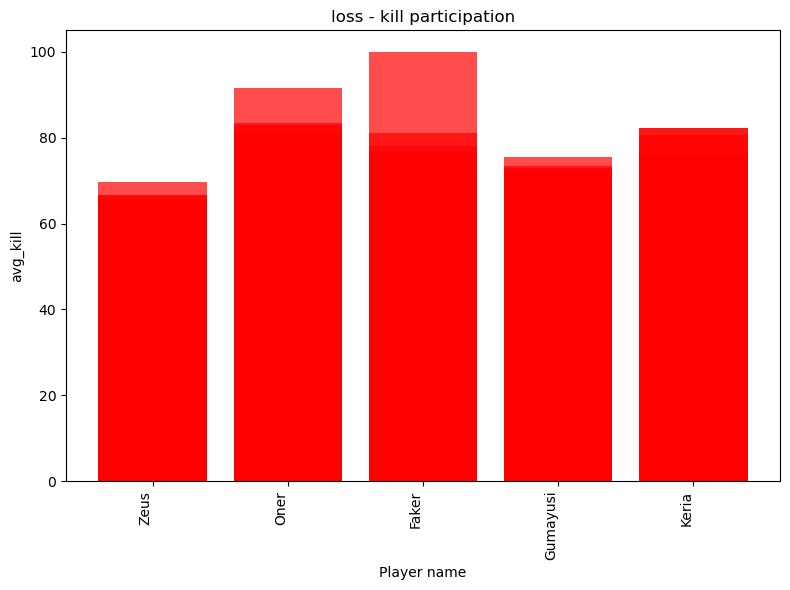

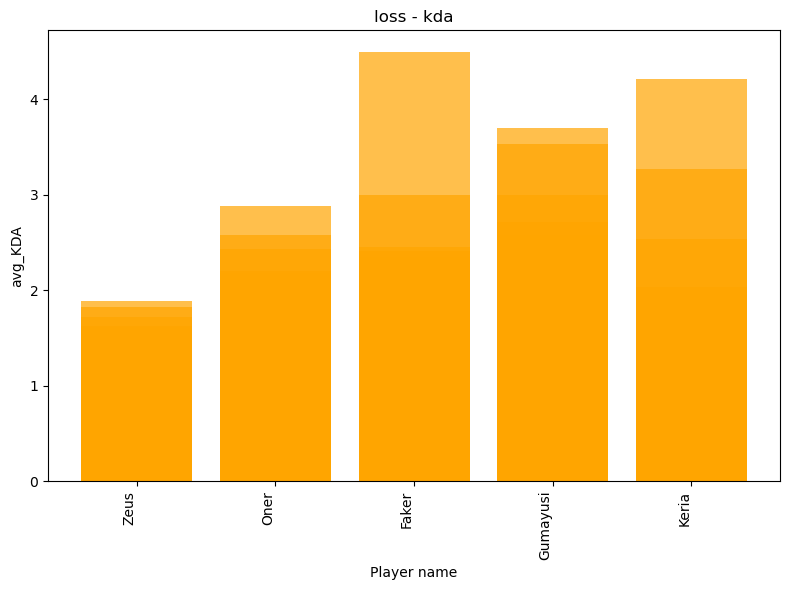

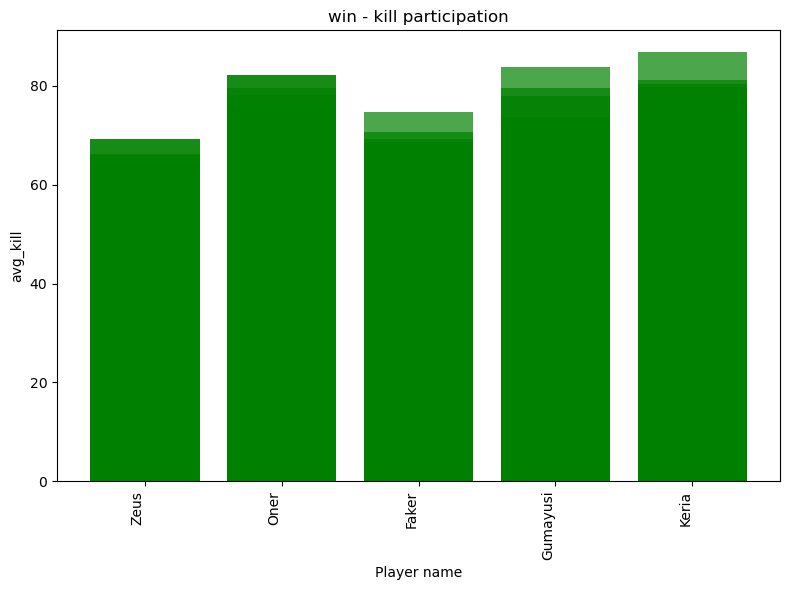

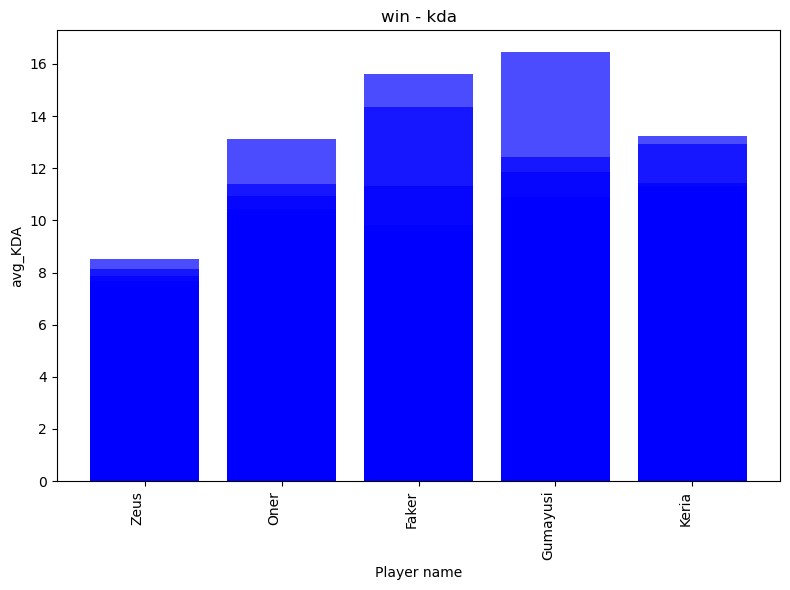

In [459]:
def plot_t1_data(data, title, column, color):

    desired_order = ['Zeus', 'Oner', 'Faker', 'Gumayusi', 'Keria']


    t1_data = data[data['Team'] == 'T1']

        # 데이터프레임의 순서 변경
    t1_data = t1_data.set_index('Player')  
    t1_data = t1_data.loc[desired_order].reset_index()
    
    if t1_data['avg_kill'].dtype == 'object':
        t1_data['avg_kill'] = t1_data['avg_kill'].str.replace('%', '').astype(float)
        
    plt.figure(figsize=(8, 6))
    for i, event in enumerate(t1_data['이벤트'].unique()):
        subset = t1_data[t1_data['이벤트'] == event]
        plt.bar(subset['Player'], subset[column], label=event, alpha=0.7, color=color)
    
    plt.title(title)
    plt.xlabel("Player name")
    plt.ylabel(column)
    plt.xticks(rotation=90, ha="right")  # Align x-axis labels to the left
    
    plt.tight_layout()
    plt.show()


# Plot for T1
plot_t1_data(filtered_kill_low, "loss - kill participation", 'avg_kill', "red")
plot_t1_data(filtered_kda_low, "loss - kda", 'avg_KDA', "orange")
plot_t1_data(filtered_kill, "win - kill participation", 'avg_kill', "green")
plot_t1_data(filtered_kda, "win - kda", 'avg_KDA', "blue")

# The entire process systematically cleans, organizes, analyzes, and visualizes the data to extract meaningful insights.


# 선수 개인 통산 데이터 로드

plt.figure(figsize=(12, 6))

# '승률' 열의 데이터 유형 확인
print(t1_data['승률'].dtype)

# '승률' 열이 문자열로 저장된 경우 변환
if t1_data['승률'].dtype == 'object':
    t1_data['승률'] = t1_data['승률'].str.replace('%', '').astype(float)

# X축 위치 설정
x_positions = np.arange(len(t1_data))  # X축 위치를 데이터 길이에 따라 균일하게 설정

# X축: 선수 이름, Y축: 승률로 시각화
bars = plt.bar(x_positions, t1_data['승률'], color='skyblue', align='center')

# X축 레이블 추가
plt.xticks(x_positions, t1_data['대표소환사명'], rotation=45, ha='center')  # X축 레이블 중앙 정렬

# 그래프 제목 및 축 레이블
plt.title('Winning Rate per Player', fontsize=16)
plt.xlabel('Player', fontsize=12)
plt.ylabel('Winning Rate (%)', fontsize=12)

# 막대 위에 승률 값 표시
for bar, win_rate in zip(bars, t1_data['승률']):
    plt.text(bar.get_x() + bar.get_width() / 2,  # X 위치
             bar.get_height() + 0.5,             # Y 위치 (막대 위로 약간 띄움)
             f'{win_rate:.1f}%',                # 텍스트 형식
             ha='center', va='bottom', fontsize=10)

# 그래프 표시
plt.tight_layout()
plt.show()


In [472]:
import pandas as pd

# 데이터 로드
file_path = 'lck_player_data.csv'  # 파일 경로
lck_player_data = pd.read_csv(file_path)

# '이름' 열을 string 타입으로 변환 (필요시)
lck_player_data['이름'] = lck_player_data['이름'].astype(str)

lck_player_data.describe(include = "all")

,순위,이름,대표소환사명,팀,경기 수,승리 수,패배 수,승률,킬 수,데스 수,어시스트 수
count,527.000000,527,527,527,527.000000,527.000000,527.000000,527,527.000000,527.000000,527.000000
unique,NaN,511,524,168,NaN,NaN,NaN,241,NaN,NaN,NaN
top,NaN,이호성,Jelly,KT Rolster,NaN,NaN,NaN,0%,NaN,NaN,NaN
freq,NaN,2,2,21,NaN,NaN,NaN,75,NaN,NaN,NaN
mean,264.567362,NaN,NaN,NaN,98.622391,49.311195,49.311195,NaN,229.677419,230.233397,551.891841
std,152.701835,NaN,NaN,NaN,151.656580,88.349967,67.653318,NaN,426.298658,324.579717,892.957849
min,1.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
25%,132.500000,NaN,NaN,NaN,6.000000,1.000000,4.000000,NaN,10.000000,18.000000,26.000000
50%,265.000000,NaN,NaN,NaN,30.000000,12.000000,18.000000,NaN,52.000000,88.000000,168.000000
75%,396.500000,NaN,NaN,NaN,126.000000,54.000000,68.000000,NaN,252.500000,309.000000,711.500000


In [467]:
# 팀 이름이 'T1' 또는 'SKT T1'인 데이터 필터링
t1_data = data[(data['팀'] == 'T1') | (data['팀'] == 'SKT T1')]

In [473]:
# '대표소환사' 필터링에서 특수문자 제거
t1_data = t1_data[
    (t1_data['대표소환사명'].str.strip() == 'Zeus') |
    (t1_data['대표소환사명'].str.strip() == 'Oner') |
    (t1_data['대표소환사명'].str.strip() == 'Faker') |
    (t1_data['대표소환사명'].str.strip() == 'Gumayusi') |
    (t1_data['대표소환사명'].str.strip() == 'Keria')
]

# 결과 확인
t1_data

,순위,이름,대표소환사명,팀,경기 수,승리 수,패배 수,승률,킬 수,데스 수,어시스트 수
0,1,이상혁,Faker,T1,994,663,331,66.7%,3346,2064,5322
10,11,류민석,Keria,T1,550,354,196,64.4%,458,1249,4718
26,27,이민형,Gumayusi,T1,384,248,136,64.6%,1514,741,1948
27,28,문현준,Oner,T1,375,245,130,65.3%,1038,863,2473
33,34,최우제,Zeus,T1,355,234,121,65.9%,990,881,1733


In [343]:
# 필터링된 데이터 확인
print(t1_data[['팀', '대표소환사명', '승률']])

     팀    대표소환사명     승률
0   T1     Faker  66.7%
10  T1     Keria  64.4%
26  T1  Gumayusi  64.6%
27  T1      Oner  65.3%
33  T1      Zeus  65.9%


float64


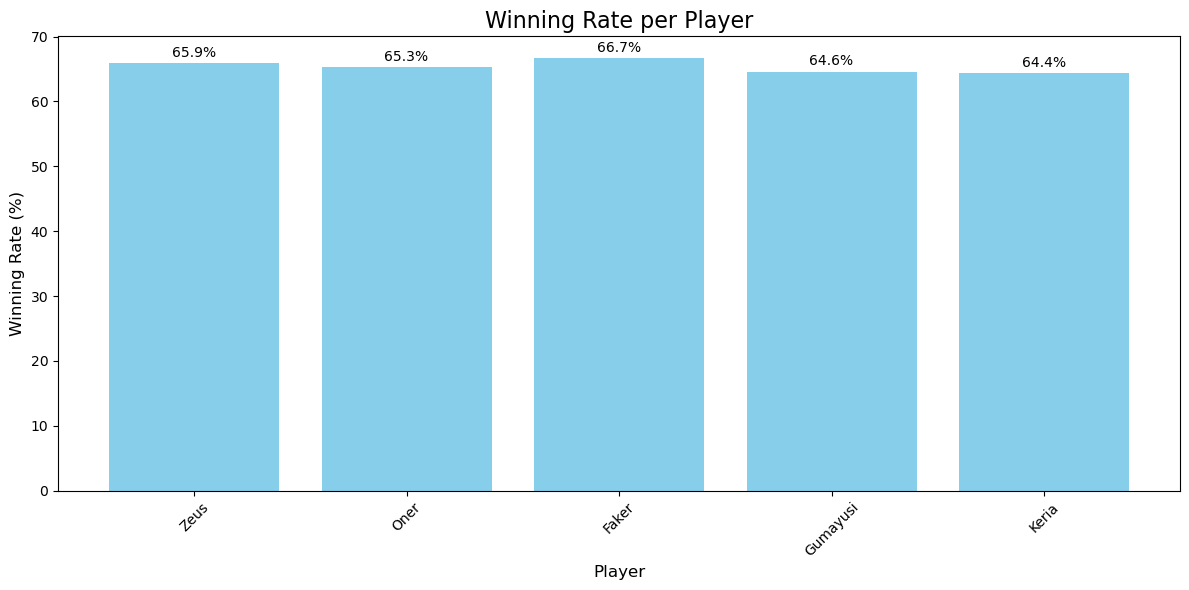

In [356]:
desired_order = ['Zeus', 'Oner', 'Faker', 'Gumayusi', 'Keria']

# 데이터프레임의 순서 변경
t1_data = t1_data.set_index('대표소환사명')  
t1_data = t1_data.loc[desired_order].reset_index()

plt.figure(figsize=(12, 6))

# '승률' 열의 데이터 유형 확인
print(t1_data['승률'].dtype)

# '승률' 열이 문자열로 저장된 경우 변환
if t1_data['승률'].dtype == 'object':
    t1_data['승률'] = t1_data['승률'].str.replace('%', '').astype(float)

# X축 위치 설정
x_positions = np.arange(len(t1_data))  # X축 위치를 데이터 길이에 따라 균일하게 설정

# X축: 선수 이름, Y축: 승률로 시각화
bars = plt.bar(x_positions, t1_data['승률'], color='skyblue', align='center')

# X축 레이블 추가
plt.xticks(x_positions, t1_data['대표소환사명'], rotation=45, ha='center')  # X축 레이블 중앙 정렬

# 그래프 제목 및 축 레이블
plt.title('Winning Rate per Player', fontsize=16)
plt.xlabel('Player', fontsize=12)
plt.ylabel('Winning Rate (%)', fontsize=12)

# 막대 위에 승률 값 표시
for bar, win_rate in zip(bars, t1_data['승률']):
    plt.text(bar.get_x() + bar.get_width() / 2,  # X 위치
             bar.get_height() + 0.5,             # Y 위치 (막대 위로 약간 띄움)
             f'{win_rate:.1f}%',                # 텍스트 형식
             ha='center', va='bottom', fontsize=10)

# 그래프 표시
plt.tight_layout()
plt.show()

